In [17]:
%matplotlib inline  
# %matplotlib qt or %matplotlib notebook plots image in an interactive window

# import libraries
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import numpy as np
import scipy.misc    # for saving images as needed
import glob          # for reading in a list of images from a folder

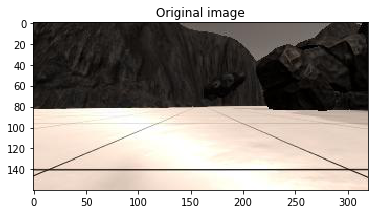

In [29]:
# plot image to choose points
example_image = mpimg.imread('./../calibration_images/example_grid1.jpg')

#%matplotlib notebook
plt.imshow(example_image)
plt.title('Original image')
plt.show()

### Selected points
__Top left corner to clockwise__  
x1 = 118.492, y1 = 96.682  
x2 = 199.782, y2 = 96.359  
x3 = 302.363, y3 = 140.23  
x4 = 13.976,  y4 = 140.23  


In [22]:
x1 = 118.492
y1 = 96.682

x2 = 199.782
y2 = 96.359

x3 = 302.363
y3 = 140.23

x4 = 13.976
y4 = 140.23

In [23]:
# perspective transform function
def perspect_transform(img, src, dst):
    
    # get transform matrix
    M = cv2.getPerspectiveTransform(src, dst)
    
    # warp image, keeping the sane size as input
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    
    return warped

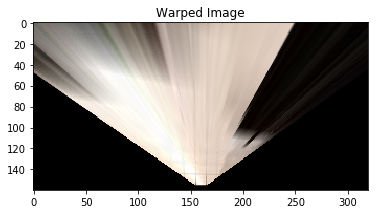

In [31]:
# define source and destination points
dx1 = 155
dy1 = 145

dx2 = 165
dy2 = 145

dx3 = 165
dy3 = 155

dx4 = 155
dy4 = 155

source = np.float32([[x1,y1], [x2,y2], [x3,y3], [x4,y4]])
destination = np.float32([[dx1,dy1], [dx2,dy2], [dx3,dy3], [dx4,dy4]])

warped = perspect_transform(example_image, source, destination)
plt.imshow(warped)
plt.title('Warped Image')
plt.show()

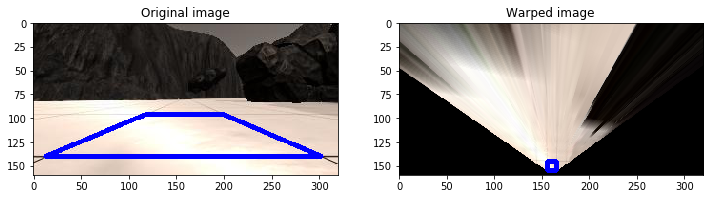

In [38]:
cv2.polylines(example_image, np.int32([source]), True, (0, 0, 255), 3)
cv2.polylines(warped, np.int32([destination]), True, (0, 0, 255), 3)

figure = plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.imshow(example_image)
plt.title('Original image')

plt.subplot(122)
plt.imshow(warped)
plt.title('Warped image')
plt.show()

In [39]:
# save output as image
mpimg.imsave('./media/grid_image.jpg', example_image)
mpimg.imsave('./media/warped_image.jpg', warped)